## CNN 알고리즘
- 딥러닝의 꽃!
- 다층 신경망의 기본적인 계산 방식은 각 1개씩 계산, 반면에 CNN은 필터(커널)를 활용하여 계산
- 파급효과
  + (은행) 손글씨 판별기를 만듬 / 상업화 성공
  + 다양한 아류(개선된) 논문들이 쏟아져 나오기 시작
  + 1998년도, LeNet 
  + 2012년도, AlexNet
  + ... VGGNet, GoogleNext
  + 2015년도 ResNet의 성능이 사람을 능가하기 시작 --> 영상인식 알고리즘 발전에 도움을 주기 시작

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras 
from sklearn.model_selection import train_test_split 

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_input.shape, train_target.shape, test_input.shape, test_target.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- 기존 신경망 1차원 배열로 재정렬
- 합성곱 신경망에서는 3차원 배열을 유지해야 함. 
- 흑백이미지인 경우도 3차원 배열로 정리

In [2]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 
train_scaled.shape

(60000, 28, 28, 1)

## 데이터셋 분리 

In [3]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

train_scaled.shape, val_scaled.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

## 합성곱 신경망 만들기
- 기본 코드의 컨셉은 다층 신경망 구현할 때와 똑같음. 

In [4]:
model = keras.Sequential()

# 3차원
                             # 32개 필터, 3 x 3 
model.add(keras.layers.Conv2D(32, 
                              kernel_size=3, 
                              activation = 'relu', 
                              padding='same', 
                              input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, 
                              kernel_size=3, 
                              activation = 'relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 1차원
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

원본 이미지
-- Cov2D ... MaxPooling : 표본 샘플이 만들어짐


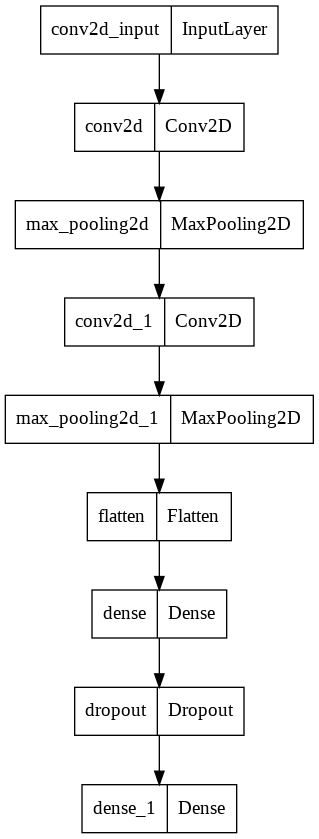

In [5]:
keras.utils.plot_model(model)

## 모형 훈련

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

## 모델 저장
- 파이썬에서 모델을 저장한다. 그러나 자바에서는 쉽게 불러올 수 없다!
- 별도의 작업이 필요하다!
  + API 구성하던가!, Embeded 형태로 코드 구현하던가! 등 


In [7]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=50, 
                    validation_data = (val_scaled, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb]) 

Epoch 1/50
1500/1500 [==============================] - 70s 46ms/step - loss: 0.5131 - accuracy: 0.8154 - val_loss: 0.3456 - val_accuracy: 0.8757
Epoch 2/50
1500/1500 [==============================] - 67s 45ms/step - loss: 0.3397 - accuracy: 0.8768 - val_loss: 0.2667 - val_accuracy: 0.8999
Epoch 3/50
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2929 - accuracy: 0.8934 - val_loss: 0.2509 - val_accuracy: 0.9055
Epoch 4/50
1500/1500 [==============================] - 70s 47ms/step - loss: 0.2618 - accuracy: 0.9038 - val_loss: 0.2338 - val_accuracy: 0.9114
Epoch 5/50
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2372 - accuracy: 0.9124 - val_loss: 0.2266 - val_accuracy: 0.9175
Epoch 6/50
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2151 - accuracy: 0.9211 - val_loss: 0.2343 - val_accuracy: 0.9142
Epoch 7/50
1500/1500 [==============================] - 70s 46ms/step - loss: 0.1986 - accuracy: 0.9270 - val_loss: 0.2214 -

## 모형 평가 그래프를 작성한다. 

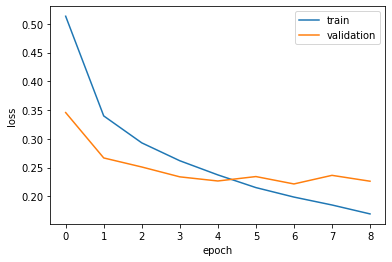

In [9]:
import matplotlib.pyplot as plt 

def eval_graph(history): 
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'validation'])
  plt.show()

eval_graph(history)

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 7s 18ms/step - loss: 0.2214 - accuracy: 0.9223


[0.22142228484153748, 0.9223333597183228]

## 저장된 모델을 불러온다. 

In [11]:
model2 = keras.models.load_model('/content/best-cnn-model.h5')
model2.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [12]:
model2.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 13ms/step - loss: 0.2214 - accuracy: 0.9223


[0.22142228484153748, 0.9223333597183228]